In [250]:
# This cell is from the template notebook. It contains ipython magic and 
# various useful imports which are commonly used in this app.

%load_ext autoreload
%autoreload 2

import pandas as pd
import datetime
import numpy as np
import os
from acoustic_data_science import config, helpers, analysis
#import acoustic_data_science.analysis.transient_durations as transient_durations
import acoustic_data_science
import matplotlib.pyplot as plt
import logging

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- Data is loudness against time with loudness in each TOL.
- Want to see transients labelled as such.
- Want to know the duration of each transient.
- Want to retain its frequency information, perhaps even the full spectrogram.

Ideal final data structure:
- Dataframe which contains the timestamp at which each transient starts and its duration.
- Can use this timestamp & duration to further investigate the transient e.g. lookup its spectrogram.

#   Get transient durations with timestamps

In [469]:
df = pd.read_feather(helpers.feather_path_from_month_name(config.processed_data_path, '2018_09'), columns=['timestamp', 'loud'])

df = df[df["loud"]]
df

,timestamp,loud
730,2018-09-01 00:06:11.000,True
1593,2018-09-01 00:13:23.000,True
1901,2018-09-01 00:15:57.000,True
2180,2018-09-01 00:18:17.000,True
2852,2018-09-01 00:23:53.500,True
...,...,...
3587516,2018-09-30 15:01:05.000,True
3588025,2018-09-30 15:05:19.500,True
3588045,2018-09-30 15:05:29.500,True
3635087,2018-09-30 21:40:09.500,True


In [470]:
df["increasing_count"] = np.arange(df.shape[0])
df["transient_group"] = df.index - df["increasing_count"]
df["duration"] = np.full(len(df), 0.5)
df.head(50)

,timestamp,loud,increasing_count,transient_group,duration
730,2018-09-01 00:06:11.000,True,0,730,0.5
1593,2018-09-01 00:13:23.000,True,1,1592,0.5
1901,2018-09-01 00:15:57.000,True,2,1899,0.5
2180,2018-09-01 00:18:17.000,True,3,2177,0.5
2852,2018-09-01 00:23:53.500,True,4,2848,0.5
3198,2018-09-01 00:26:47.000,True,5,3193,0.5
3212,2018-09-01 00:26:54.000,True,6,3206,0.5
3695,2018-09-01 00:30:55.500,True,7,3688,0.5
3696,2018-09-01 00:30:56.000,True,8,3688,0.5
3877,2018-09-01 00:32:27.000,True,9,3868,0.5


In [274]:
transient_durations_series = df.groupby(['transient_group'])['duration'].sum()
# Starting index of transients gets lost when grouping.
# Recover by taking cumulative sum of the durations and divide by the duration length (0.5 s) to get the number of skipped rows.
transient_durations_df_index = (transient_durations_series.index + transient_durations_series.cumsum(axis=0)/0.5 - np.ones(len(transient_durations_series))).astype('int').values

transient_durations_df = pd.DataFrame({'transient_group':transient_durations_df_index, 'duration':transient_durations_series.values})
transient_durations_df

,transient_group,duration
0,730,0.5
1,1593,0.5
2,1901,0.5
3,2180,0.5
4,2852,0.5
...,...,...
1370,3587516,2.5
1371,3588025,0.5
1372,3588045,0.5
1373,3635087,0.5


In [275]:
transient_durations_df["timestamp"] = df[df.index.isin(transient_durations_df["transient_group"])]['timestamp'].values
df[df.index.isin(transient_durations_df["transient_group"])]['timestamp']
transient_durations_df.head(50)

,transient_group,duration,timestamp
0,730,0.5,2018-09-01 00:06:11.000
1,1593,0.5,2018-09-01 00:13:23.000
2,1901,0.5,2018-09-01 00:15:57.000
3,2180,0.5,2018-09-01 00:18:17.000
4,2852,0.5,2018-09-01 00:23:53.500
5,3198,0.5,2018-09-01 00:26:47.000
6,3212,0.5,2018-09-01 00:26:54.000
7,3696,1.0,2018-09-01 00:30:56.000
8,3877,0.5,2018-09-01 00:32:27.000
9,3904,0.5,2018-09-01 00:32:40.500


#   Extend to whole year

In [334]:
"""
# OLD, see new func below
def get_transient_timestamps_and_durations(df):
    # Just get the loud events.
    df = df[df["loud"]]

    # Each transient has a number called transient_group.
    # Half-seconds in the same transient have the same transient_group.
    df["transient_group"] = df.index - np.arange(df.shape[0])

    # Recover the original index lost by grouping.
    # =========================================================================
    df["duration"] = np.full(len(df), 0.5).tolist()
    
    transients_series = df.groupby(['transient_group'])['duration'].sum()
    # Starting index of transients gets lost when grouping.
    # Recover by taking cumulative sum of the durations and divide by the duration length (0.5 s) to get the number of skipped rows.
    transients_df_index = (transients_series.index + transients_series.cumsum(axis=0)/0.5 - np.ones(len(transients_series))).astype('int').values
    # =========================================================================

    transients_df = pd.DataFrame({'transient_group':transients_df_index, 'duration':transients_series.values})

    transients_df["timestamp"] = df[df.index.isin(transients_df["transient_group"])]['timestamp'].values
    transients_df[:, '25':'25119'] = df[df.index.isin(transients_df["transient_group"])].loc[:, '25':'25119']

    #transients_df.drop(columns=['transient_group'], inplace=True)

    return transients_df
"""

'\n# OLD, see new func below\ndef get_transient_timestamps_and_durations(df):\n    # Just get the loud events.\n    df = df[df["loud"]]\n\n    # Each transient has a number called transient_group.\n    # Half-seconds in the same transient have the same transient_group.\n    df["transient_group"] = df.index - np.arange(df.shape[0])\n\n    # Recover the original index lost by grouping.\n    # =========================================================================\n    df["duration"] = np.full(len(df), 0.5).tolist()\n    \n    transients_series = df.groupby([\'transient_group\'])[\'duration\'].sum()\n    # Starting index of transients gets lost when grouping.\n    #\xa0Recover by taking cumulative sum of the durations and divide by the duration length (0.5 s) to get the number of skipped rows.\n    transients_df_index = (transients_series.index + transients_series.cumsum(axis=0)/0.5 - np.ones(len(transients_series))).astype(\'int\').values\n    # ========================================

In [408]:
def get_transients(df, average_tols=False):
    # Just get the loud events.
    df = df[df["loud"]]

    # Each transient has a number called transient_group.
    # Half-seconds in the same transient have the same transient_group.
    df.loc[:, "transient_group"] = df.index - np.arange(df.shape[0])
    # Recover the original index lost by grouping.
    # =========================================================================
    df.loc[:, "duration"] = np.full(len(df), 0.5).tolist()
    transient_groups_summed = df.groupby(['transient_group']).sum()
    durations = transient_groups_summed["duration"]

    # Starting index of transients gets lost when grouping.
    # Recover by taking cumulative sum of the durations and divide by the duration length (0.5 s) to get the number of skipped rows.
    durations_index = (durations.index + durations.cumsum(axis=0)/0.5 - np.ones(len(durations))).astype('int').values
    # =========================================================================

    transients_df = df[df.index.isin(durations_index)]
    transients_df.loc[:, "duration"] = durations.values
    transients_df.drop(columns=['transient_group'], inplace=True)

    transients_df = transients_df.reset_index(drop=True)

    if average_tols:
        transients_df.loc[:, "25":"25119"] = transients_df.loc[:, "25":"25119"].div(transients_df["duration"]/0.5, axis=0)
    
    return transients_df

In [409]:
monthly_feather_paths = helpers.get_feather_paths(config.processed_data_path + '/monthly_data')
month_names = helpers.get_month_names(config.processed_data_path + '/monthly_data')
for monthly_feather_path, month_name in zip(monthly_feather_paths, month_names):
    df = pd.read_feather(monthly_feather_path).drop(columns=['unnormalised_broadband_spl', "short_transient"])
    transients_df = get_transients(df, average_tols=True)
    transients_df.to_feather(os.path.join(config.processed_data_path,f'transients/{month_name}.feather'))


In [410]:
pd.read_feather(os.path.join(config.processed_data_path,f'transients/2018_08.feather'))

,25,32,40,50,63,79,100,126,158,200,...,12589,15849,19953,25119,filename,timestamp,broadband_spl,background_spl,loud,duration
0,39.443851,38.261829,38.885872,35.091160,34.397610,37.826786,44.614445,42.026836,55.126270,61.754940,...,40.063034,39.337704,37.141041,34.856758,ICLISTENHF1266_20180802T002304.000Z_TOL_1sHann...,2018-08-02 00:23:27.000,-22.995746,-37.432621,True,1.0
1,69.029274,69.589935,65.984360,63.154137,60.240952,57.892403,64.096855,63.892109,62.863350,62.045513,...,75.021454,76.394241,74.274689,67.884392,ICLISTENHF1266_20180802T025804.000Z_TOL_1sHann...,2018-08-02 02:59:59.000,-57.889096,-67.914476,True,0.5
2,66.863640,70.259956,68.365021,68.890602,61.871201,67.794281,63.187988,60.906067,60.242050,61.349785,...,80.909615,76.675468,76.744865,72.688705,ICLISTENHF1266_20180802T031304.000Z_TOL_1sHann...,2018-08-02 03:16:33.000,-53.314632,-66.782131,True,0.5
3,62.698452,68.278770,64.787598,65.677116,62.916901,53.346474,56.977230,57.937283,63.684376,61.940426,...,72.601151,74.035378,72.448784,72.281166,ICLISTENHF1266_20180802T032304.000Z_TOL_1sHann...,2018-08-02 03:27:35.500,-57.715968,-69.382723,True,0.5
4,58.710720,62.790684,66.277863,65.653748,59.980873,59.472771,59.706337,64.054565,67.307297,70.367569,...,82.154961,79.603065,79.779694,78.211487,ICLISTENHF1266_20180802T032804.000Z_TOL_1sHann...,2018-08-02 03:28:33.500,-48.171835,-69.391579,True,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,26.226626,26.122421,26.716682,25.495600,33.019101,26.231214,26.976186,29.090726,23.136793,25.143743,...,20.161419,20.049335,20.433511,19.485972,ICLISTENHF1266_20180831T202303.000Z_TOL_1sHann...,2018-08-31 20:28:01.500,-46.597560,-60.865072,True,1.5
2389,79.740242,80.812820,77.935974,77.446098,81.302063,81.558205,83.215492,84.879898,85.522659,87.215691,...,59.090401,59.264446,60.665833,57.954975,ICLISTENHF1266_20180831T203802.000Z_TOL_1sHann...,2018-08-31 20:42:01.000,-45.917893,-60.123052,True,0.5
2390,98.253624,89.271980,79.464699,76.044868,70.927383,72.530312,70.380821,68.705582,63.174934,59.325085,...,57.782455,58.750751,60.365932,57.705479,ICLISTENHF1266_20180831T232601.000Z_TOL_1sHann...,2018-08-31 23:28:41.500,-48.491834,-60.898551,True,0.5
2391,34.699913,35.238956,35.207687,31.732063,28.979609,30.586838,31.129381,33.022655,36.416950,37.290073,...,30.576677,31.501495,30.375212,28.812649,ICLISTENHF1266_20180831T235101.000Z_TOL_1sHann...,2018-08-31 23:51:41.000,-55.488266,-66.487689,True,1.0


In [436]:
whole_year_df = pd.read_feather(config.processed_data_path + '/whole_year/whole_year.feather')
whole_year_df["loud"] = whole_year_df["broadband_spl"] > whole_year_df["background_spl"] + 10
whole_year_transients_df = get_transients(whole_year_df)
whole_year_transients_df = whole_year_transients_df.drop(columns=["loud"])
whole_year_transients_df.to_feather(config.processed_data_path + '/transients/whole_year_transients_and_durations.feather')
whole_year_transients_df

/Users/georgeamccarthy/opt/anaconda3/envs/ads/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/georgeamccarthy/opt/anaconda3/envs/ads/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/georgeamccarthy/opt/anaconda3/envs/ads/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is tryi

,timestamp,broadband_spl,background_spl,duration
0,2018-08-02 00:23:27.000,-22.995746,-37.432621,1.0
1,2018-08-02 02:59:59.000,-57.889096,-67.914476,0.5
2,2018-08-02 03:16:33.000,-53.314632,-66.782131,0.5
3,2018-08-02 03:27:35.500,-57.715968,-69.382723,0.5
4,2018-08-02 03:28:33.500,-48.171835,-69.391579,0.5
...,...,...,...,...
261185,2019-05-31 22:49:43.355,-49.160556,-66.441335,0.5
261186,2019-05-31 22:51:03.855,-43.255208,-55.391356,0.5
261187,2019-05-31 22:53:23.007,-58.139489,-68.335236,1.0
261188,2019-05-31 22:55:19.507,-54.964348,-67.469046,0.5


#   Plotting

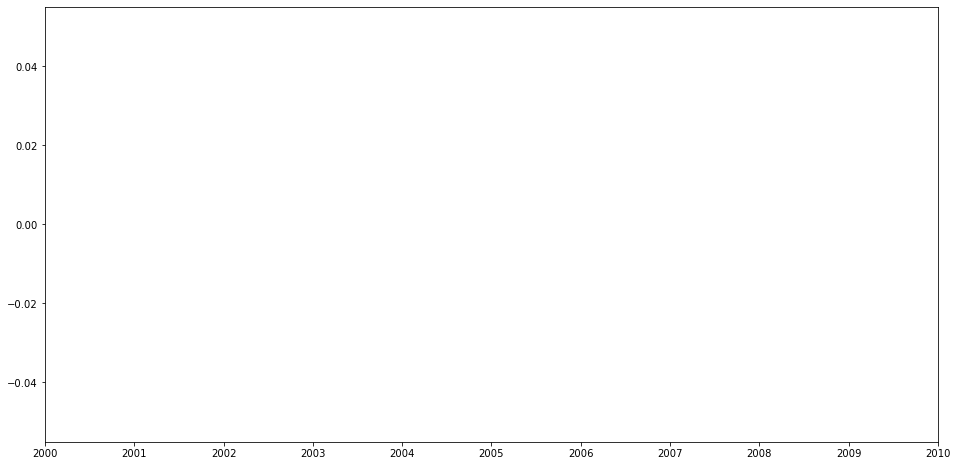

Series([], dtype: int64)

In [457]:
def plot_transients(df, min_duration=None, max_duration=None):
    if min_duration is not None:
        df = df[df["duration"] >= min_duration]

    if max_duration is not None:
        df = df[df["duration"] <= max_duration]

    # Floor timestamp column to the day to get YYYY-MM-DD
    days = df['timestamp'].dt.floor('D')
    transients_per_day = df.groupby(days).size()
    # Day.
    x = transients_per_day.index
    # Number of transients per day.
    y = transients_per_day.values

    plt.figure(figsize=(16,8))
    plt.scatter(x, y)
    plt.show()

    return transients_per_day

In [465]:
#df = pd.read_feather(config.processed_data_path + '/transients/whole_year_transients_and_durations.feather')
df = pd.read_feather(config.processed_data_path + "/transients/2018_08.feather")

4.0

In [480]:
df = pd.read_feather(config.processed_data_path + "/monthly_data/2018_08.feather")
print(len(df))

# Old func.
def get_transient_durations(df):
    df = df[df["loud"]]

    # Mask df to only get loud rows.
    df['transient_group'] = (df.index - np.arange(df.shape[0]))
    index_groups = df['transient_group'].unique()
    
    transient_durations = []
    for index_group in index_groups:
        transient_times = df[df['transient_group']==index_group]['timestamp'].values
        transient_durations.append((transient_times[-1] - transient_times[0]).astype('float')/1e9 + 0.5)
    
    # Cull any detected transient with length longer than 5 mins. Arbitrary for now.
    #transient_durations[i] = transient_durations[transient_durations < 5*60]
    transient_durations = np.array(transient_durations)
    return transient_durations

transient_durations = get_transient_durations(df)
transient_durations

4757346


/var/folders/xw/j5fzsq4j5d5gfqy4tsdkbz0h0000gn/T/ipykernel_10468/2320737115.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transient_group'] = (df.index - np.arange(df.shape[0]))


array([1. , 0.5, 0.5, ..., 0.5, 1. , 1. ])

In [479]:
transient_durations.max()

4.0